In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
##import libraries for ANN

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential

In [3]:
## warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the data set
train_data = pd.read_csv('train_loandata.csv')
test_data = pd.read_csv('test_loandata.csv')


In [5]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
## Check for missing values
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean())
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].mean())

In [10]:
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])

In [11]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
train_data['ApplicantIncome']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

In [13]:
train_data[['ApplicantIncome', 'LoanAmount']]

,ApplicantIncome,LoanAmount
0,5849,146.412162
1,4583,128.000000
2,3000,66.000000
3,2583,120.000000
4,6000,141.000000
...,...,...
609,2900,71.000000
610,4106,40.000000
611,8072,253.000000
612,7583,187.000000


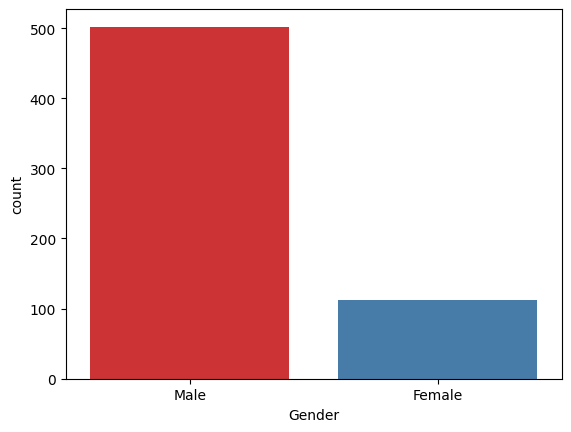

In [14]:
# count plot
sns.countplot(x='Gender', data=train_data, palette='Set1')
plt.show()

<Axes: xlabel='Gender', ylabel='Proportion'>

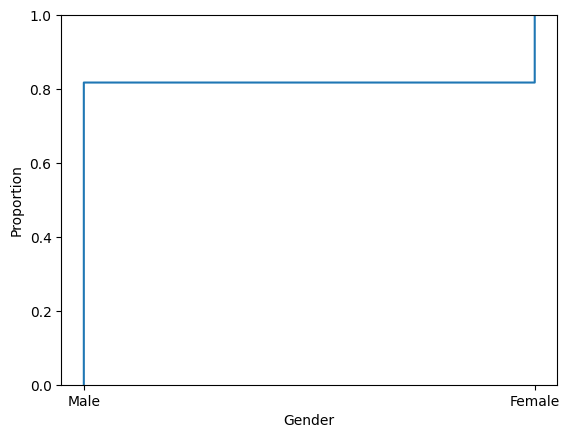

In [15]:
sns.ecdfplot(train_data['Gender'])

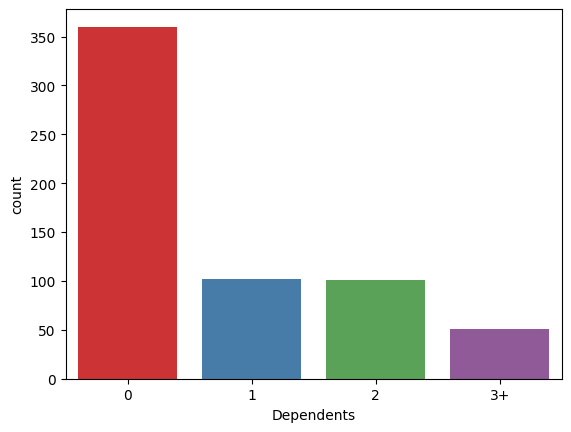

In [16]:
# Assuming df is your DataFrame
sns.countplot(x='Dependents', data=train_data, palette='Set1')  # You can choose any palette you prefer
plt.show()

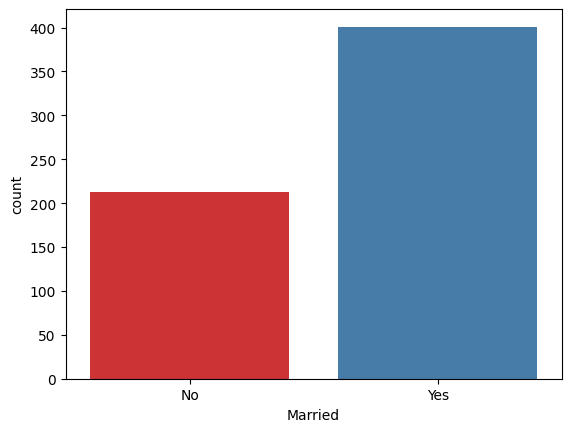

In [17]:
# count plot
sns.countplot(x='Married', data=train_data, palette='Set1')
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

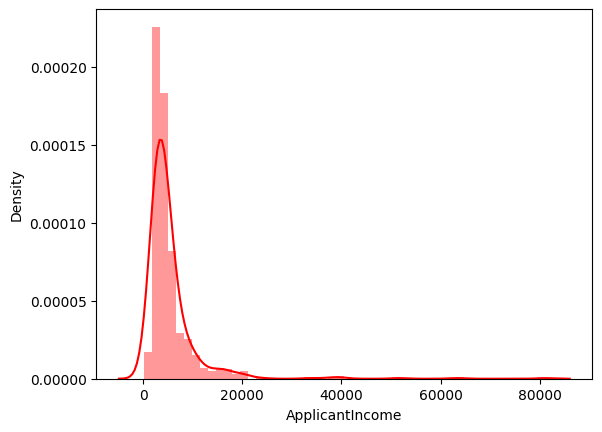

In [18]:
# numerical data
sns.distplot(train_data['ApplicantIncome'], color='red')

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

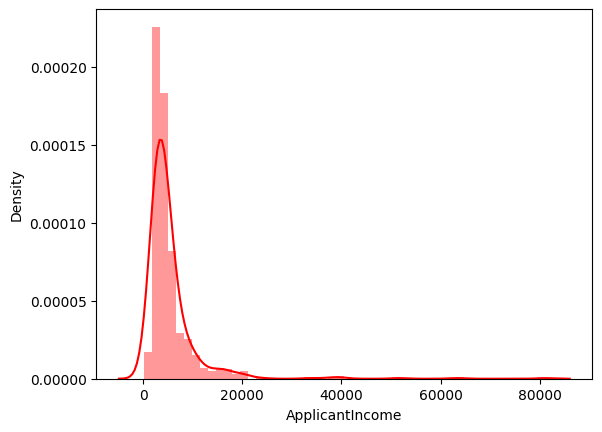

In [19]:
train_data['ApplicantIncome'] = np.log(train_data['ApplicantIncome'])
train_data['ApplicantIncome'] = np.exp(train_data['ApplicantIncome'])
sns.distplot(train_data['ApplicantIncome'], color='red')

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

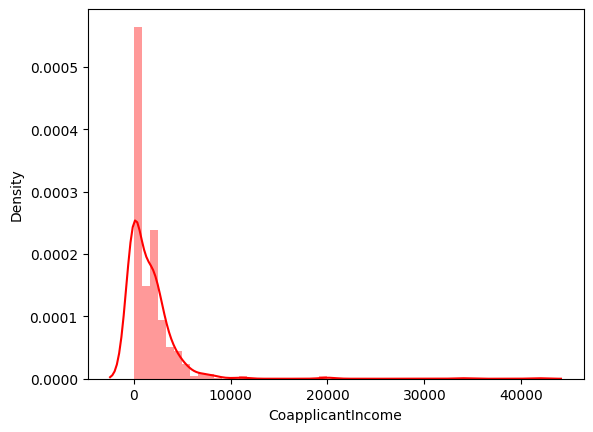

In [20]:
sns.distplot(train_data['CoapplicantIncome'], color='red')

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

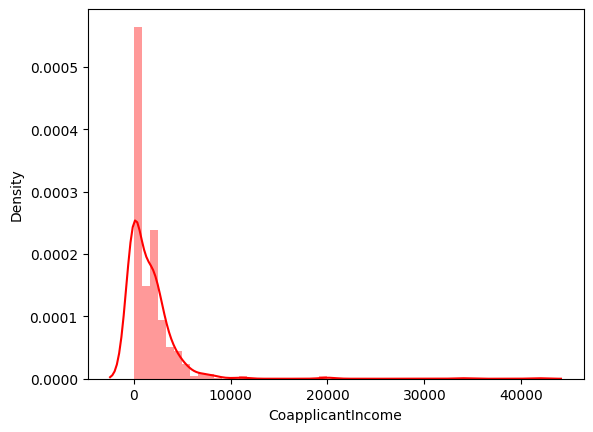

In [21]:
train_data['CoapplicantIncome'] = np.log(train_data['CoapplicantIncome'])
train_data['CoapplicantIncome'] = np.exp(train_data['CoapplicantIncome'])
sns.distplot(train_data['CoapplicantIncome'], color='red')

<Axes: xlabel='LoanAmount', ylabel='Density'>

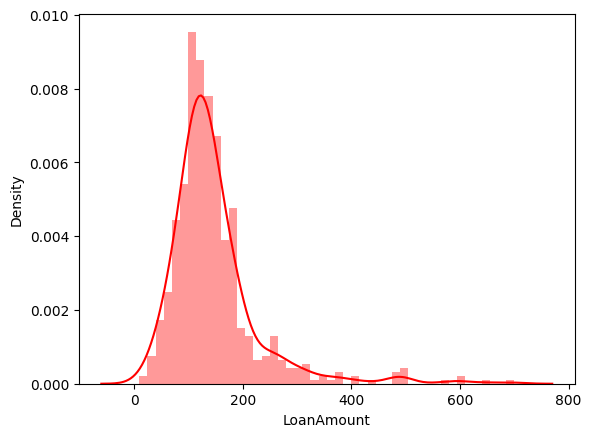

In [22]:
sns.distplot(train_data['LoanAmount'], color='red')

<Axes: xlabel='LoanAmount', ylabel='Density'>

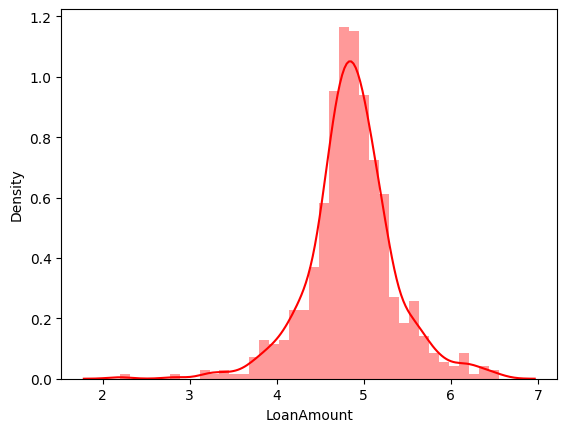

In [23]:
train_data['LoanAmount'] = np.log(train_data['LoanAmount'])
sns.distplot(train_data['LoanAmount'], color='red')

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

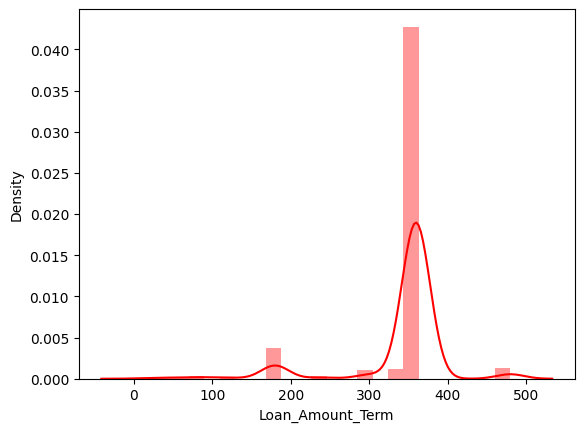

In [24]:
sns.distplot(train_data['Loan_Amount_Term'], color='red')

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

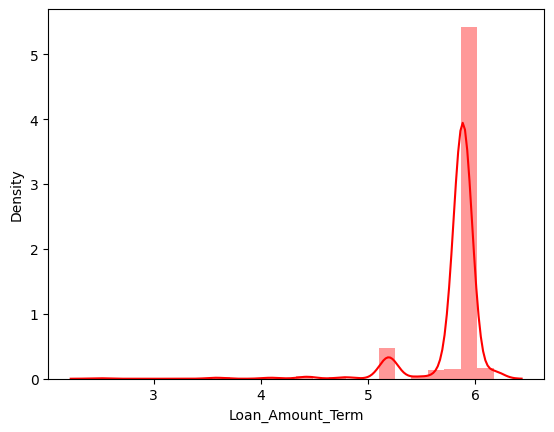

In [25]:
train_data['Loan_Amount_Term'] = np.log(train_data['Loan_Amount_Term'])
sns.distplot(train_data['Loan_Amount_Term'], color='red')

<Axes: xlabel='Credit_History', ylabel='Density'>

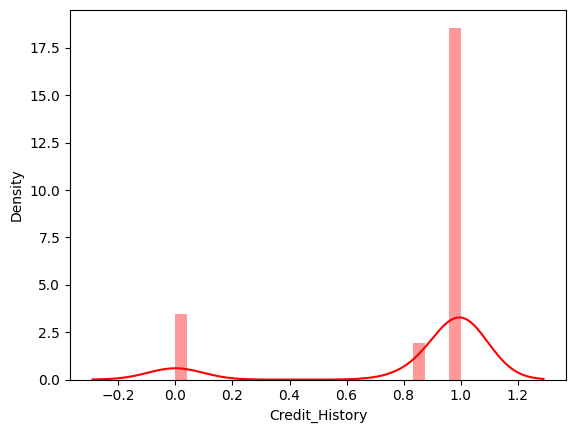

In [26]:
sns.distplot(train_data['Credit_History'], color='red')

In [27]:
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,4.986426,5.886104,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,4.852030,5.886104,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,4.189655,5.886104,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,4.787492,5.886104,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,4.948760,5.886104,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

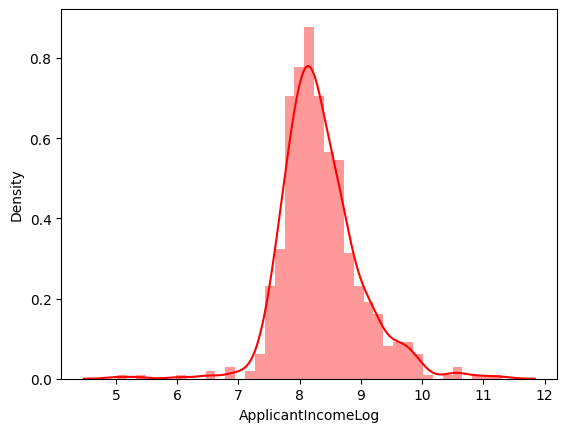

In [28]:
# data transformation
# np.log is used to handle normal distribution problem
train_data['ApplicantIncomeLog'] = np.log(train_data['ApplicantIncome'])
sns.distplot(train_data['ApplicantIncomeLog'], color='red')

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Count'>

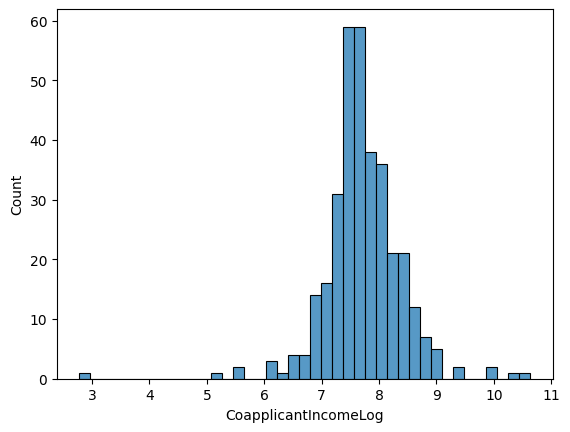

In [29]:
train_data['CoapplicantIncomeLog'] = np.log(train_data['CoapplicantIncome'])
sns.histplot(train_data['CoapplicantIncomeLog'])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

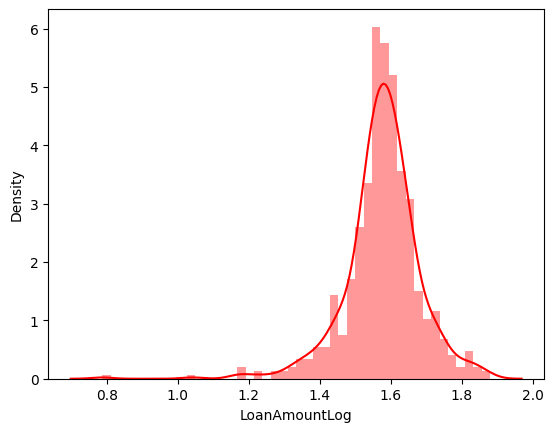

In [30]:
train_data['LoanAmountLog'] = np.log(train_data['LoanAmount'])
sns.distplot(train_data["LoanAmountLog"], color='red')

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

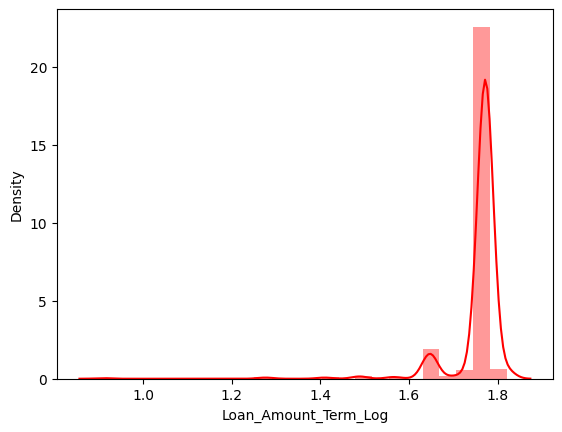

In [31]:
train_data['Loan_Amount_Term_Log'] = np.log(train_data['Loan_Amount_Term'])
sns.distplot(train_data['Loan_Amount_Term_Log'], color='red')

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

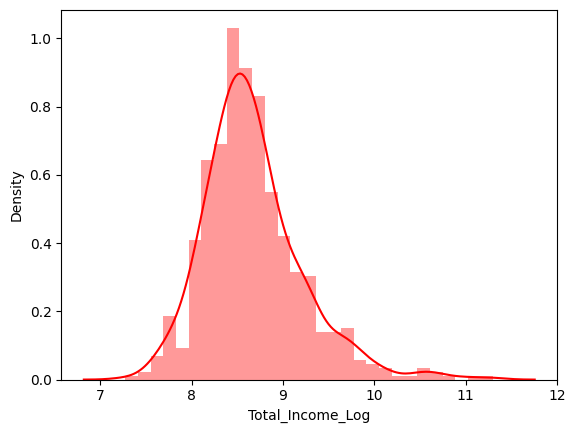

In [32]:
train_data['Total_Income_Log'] = np.log(train_data['Total_Income'])
sns.distplot(train_data['Total_Income_Log'], color = 'red')

In [33]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,4.862066,5.802065,0.842199,7024.705081,8.341213,-inf,1.575982,1.756388,8.669414
std,6109.041673,2926.248369,0.496575,0.312482,0.349681,6458.663872,0.645263,NaN,0.106724,0.064476,0.545102
min,150.000000,0.000000,2.197225,2.484907,0.000000,1442.000000,5.010635,-inf,0.787195,0.910235,7.273786
25%,2877.500000,0.000000,4.607658,5.886104,1.000000,4166.000000,7.964677,NaN,1.527719,1.772594,8.334712
50%,3812.500000,1188.500000,4.859812,5.886104,1.000000,5416.500000,8.246040,7.080284,1.581000,1.772594,8.597205
75%,5795.000000,2297.250000,5.104426,5.886104,1.000000,7521.750000,8.664750,7.739462,1.630108,1.772594,8.925549
max,81000.000000,41667.000000,6.551080,6.173786,1.000000,81000.000000,11.302204,10.637465,1.879630,1.820312,11.302204


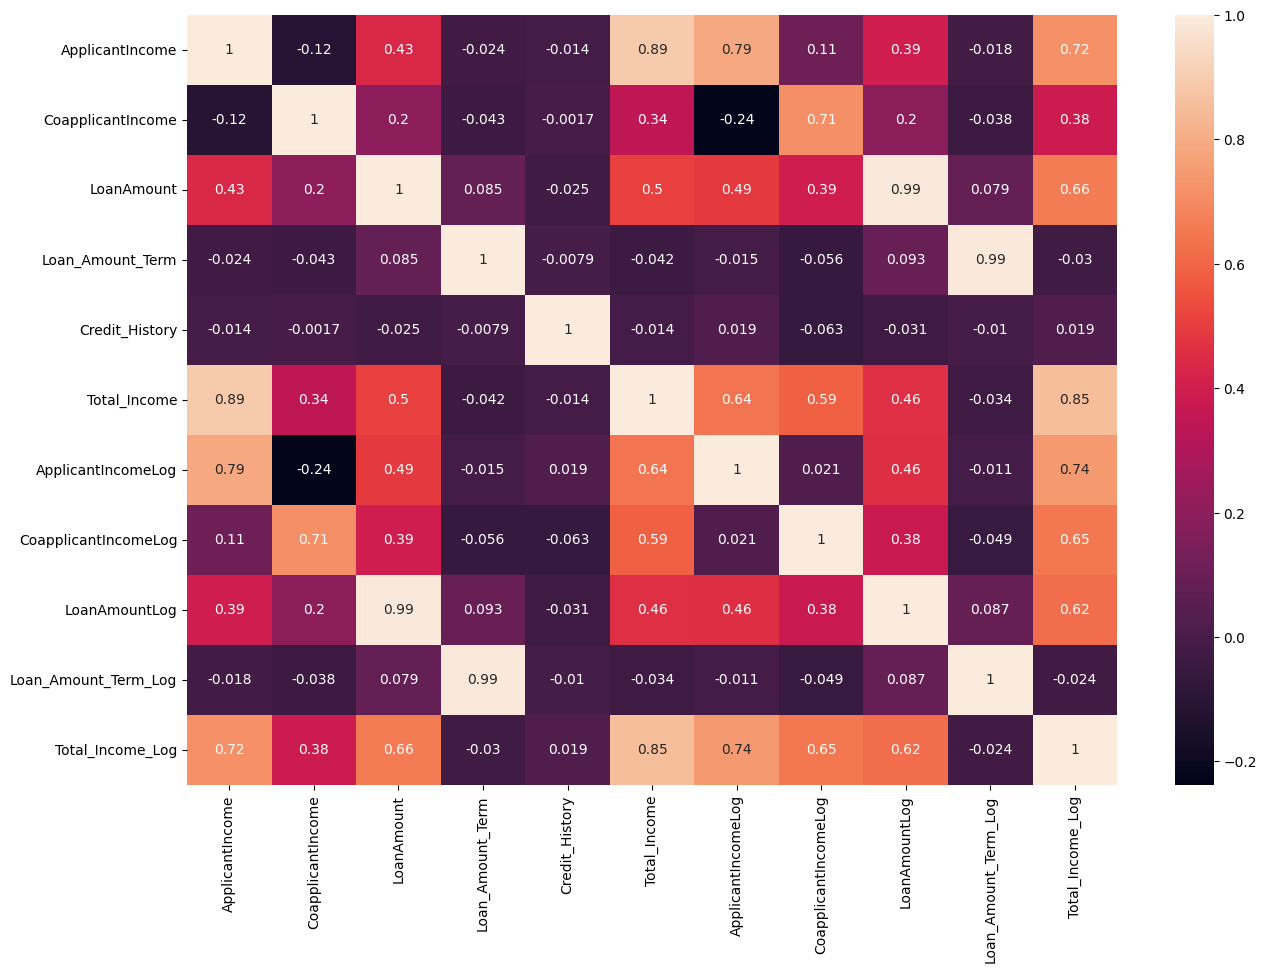

In [34]:
# Select only numeric columns
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = train_data[numeric_columns]

# Calculate the correlation matrix
corr = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, annot_kws={'size': 10})
plt.show()

In [35]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,4.986426,5.886104,1.0,Urban,Y,5849.0,8.674026,-inf,1.606719,1.772594,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,4.852030,5.886104,1.0,Rural,N,6091.0,8.430109,7.318540,1.579397,1.772594,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,4.189655,5.886104,1.0,Urban,Y,3000.0,8.006368,-inf,1.432618,1.772594,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,4.787492,5.886104,1.0,Urban,Y,4941.0,7.856707,7.765569,1.566007,1.772594,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,4.948760,5.886104,1.0,Urban,Y,6000.0,8.699515,-inf,1.599137,1.772594,8.699515


In [36]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_ID', 'CoapplicantIncomeLog']
train_data = train_data.drop(columns = cols, axis = 1)
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,1.606719,1.772594,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,1.579397,1.772594,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,1.432618,1.772594,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,1.566007,1.772594,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,1.599137,1.772594,8.699515


In [37]:
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
le = LabelEncoder()
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])

In [38]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,1.606719,1.772594,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,1.579397,1.772594,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,1.432618,1.772594,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,1.566007,1.772594,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,1.599137,1.772594,8.699515


In [39]:
train_data.Loan_Status.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [40]:
# test datasets
test_data = pd.read_csv('test_loandata.csv')
# filling numerical missing data
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean())
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean())
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].mean())

# filling categorical missing data
test_data['Gender']=test_data['Gender'].fillna(test_data['Gender'].mode()[0])
test_data['Married']=test_data['Married'].fillna(test_data['Married'].mode()[0])
test_data['Dependents']=test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])

test_data['Total_income'] = test_data['ApplicantIncome']+test_data['CoapplicantIncome']

# apply log transformation to the attribute
test_data['ApplicantIncomeLog'] = np.log(test_data['ApplicantIncome'])

test_data['CoapplicantIncomeLog'] = np.log(test_data['CoapplicantIncome'])

test_data['LoanAmountLog'] = np.log(test_data['LoanAmount'])

test_data['Loan_Amount_Term_Log'] = np.log(test_data['Loan_Amount_Term'])

test_data['Total_Income_Log'] = np.log(test_data['Total_income'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
test_data = test_data.drop(columns=cols, axis=1)
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
le = LabelEncoder()
for col in cols:
   test_data[col] = le.fit_transform(test_data[col])

In [41]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,1,0,0,0,1.000000,2,8.651724,4.700480,5.886104,8.651724
1,1,1,1,0,0,1.000000,2,8.031385,4.836282,5.886104,8.428581
2,1,1,2,0,0,1.000000,2,8.517193,5.337538,5.886104,8.824678
3,1,1,2,0,0,0.825444,2,7.757906,4.605170,5.886104,8.494129
4,1,0,0,1,0,1.000000,2,8.094378,4.356709,5.886104,8.094378


In [42]:
# specify input and output attributes
X = train_data.drop(columns=['Loan_Status'], axis=1)
y = train_data['Loan_Status']

In [43]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,8.674026,1.606719,1.772594,8.674026
1,1,1,1,0,0,1.0,0,8.430109,1.579397,1.772594,8.714568
2,1,1,0,0,1,1.0,2,8.006368,1.432618,1.772594,8.006368
3,1,1,0,1,0,1.0,2,7.856707,1.566007,1.772594,8.505323
4,1,0,0,0,0,1.0,2,8.699515,1.599137,1.772594,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972466,1.449898,1.772594,7.972466
610,1,1,3,0,0,1.0,0,8.320205,1.305323,1.647303,8.320205
611,1,1,1,0,0,1.0,2,8.996157,1.710801,1.772594,9.025456
612,1,1,2,0,0,1.0,2,8.933664,1.654623,1.772594,8.933664


In [44]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [45]:
## Split the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=32)

In [46]:
##Preprocessing data
## standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
##LOGISTIC REGRESSION MODEL

In [48]:
## Train the model
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [49]:
## Make predictions
y_pred_LR = model_LR.predict(X_test)

In [50]:
# Create a dataframe with the prediction
pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred_LR})

,Actual,Predicted
51,1,1
19,1,1
494,0,0
612,1,1
188,1,1
...,...,...
378,0,1
479,0,1
44,1,1
461,1,1


In [51]:
## Model evaluation 
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(accuracy_LR)

0.7967479674796748


In [52]:
## Confusion matrix
conf_mat_LR = confusion_matrix(y_test, y_pred_LR)
print(conf_mat_LR)

[[18 23]
 [ 2 80]]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

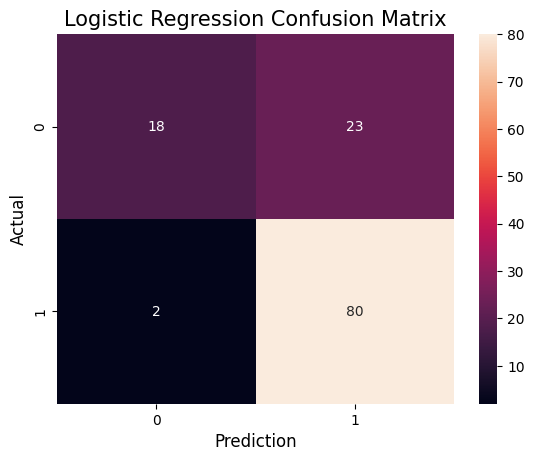

In [53]:
## Confusion matrix plot
sns.heatmap(conf_mat_LR, annot=True)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Logistic Regression Confusion Matrix', fontsize = 15)

In [54]:
auc_LR = roc_auc_score(y_test, y_pred_LR)
print('AUC: ',auc_LR)

AUC:  0.7073170731707317


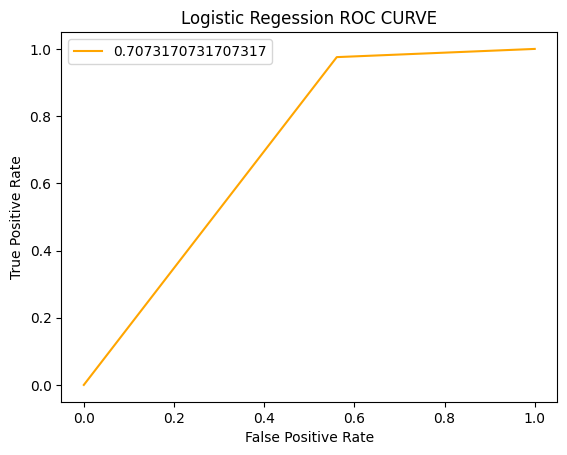

In [55]:
#False positive & true positive rate
# Underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_LR)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regession ROC CURVE')
plt.legend()
plt.show()

In [56]:
## Classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        41
           1       0.78      0.98      0.86        82

    accuracy                           0.80       123
   macro avg       0.84      0.71      0.73       123
weighted avg       0.82      0.80      0.77       123



In [57]:
import pickle
with open("model_LR.pkl", 'rb') as file:
    # Load the object from the pickle file
    model = pickle.load(file)

In [58]:
## NAIVE BAYES MODEL

In [59]:
## Create our Naive Bayes model
model_NB = GaussianNB()
## using  training data for fitting
model_NB.fit(X_train, y_train)

GaussianNB()

In [60]:
## Using test data to make prediction
y_pred_NB = model_NB.predict(X_test)

In [61]:
## Putting it in a dataframe

pd.DataFrame({'actual': y_test, 'Predicted': y_pred_NB})

,actual,Predicted
51,1,1
19,1,1
494,0,0
612,1,1
188,1,1
...,...,...
378,0,1
479,0,1
44,1,1
461,1,1


In [62]:
## Model evaluation
accuracy_NB = accuracy_score(y_test, y_pred_NB )

## Confusion matrix
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.7886178861788617
[[17 24]
 [ 2 80]]


In [63]:
## Classification report
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.89      0.41      0.57        41
           1       0.77      0.98      0.86        82

    accuracy                           0.79       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.79      0.76       123



Text(0.5, 1.0, 'Naive Bayes Gaussian Confusion Matrix')

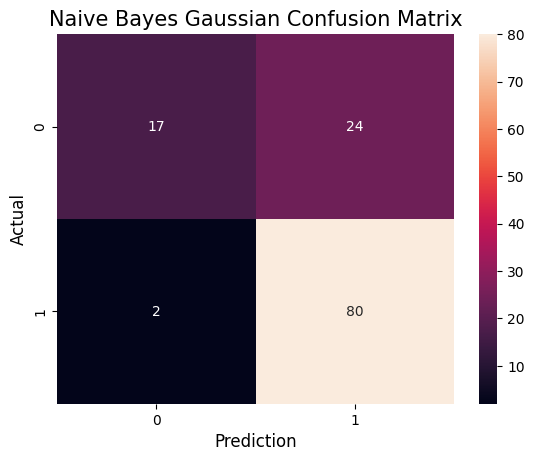

In [64]:
## Confusion matrix plot
sns.heatmap(conf_mat_NB, annot=True)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Naive Bayes Gaussian Confusion Matrix', fontsize = 15)

In [65]:
auc_NB = roc_auc_score(y_test, y_pred_NB)
print('AUC: ',auc_NB)

AUC:  0.6951219512195121


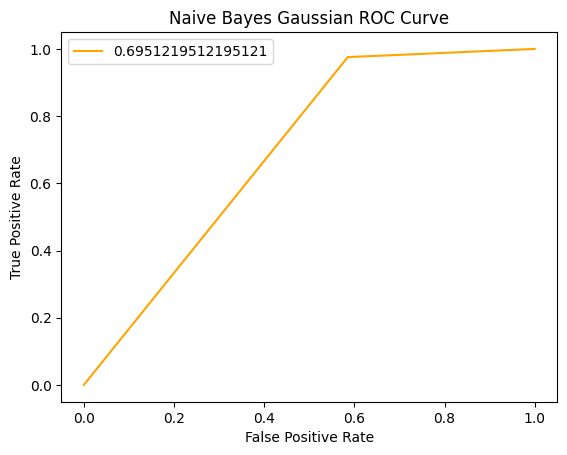

In [66]:
#false positive & true positive rate
# underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_NB)
plt.plot(fpr, tpr, color = 'orange', label = auc_NB)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Gaussian ROC Curve')
plt.legend()
plt.show()

In [67]:
## RANDOM FOREST MODEL

In [68]:
RF_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [69]:
## Make predictions
y_pred_RF = RF_model.predict(X_test)

In [70]:
## Put the predictions in a dataframe
RF_model_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_RF})
RF_model_output

,Actual,Predicted
51,1,1
19,1,1
494,0,0
612,1,1
188,1,1
...,...,...
378,0,1
479,0,1
44,1,1
461,1,1


In [71]:
## Evaluating model accuracy
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(accuracy_RF)

0.7886178861788617


In [72]:
## Confusion matrix
conf_mat_RF = confusion_matrix(y_test, y_pred_RF)
print(conf_mat_RF)

[[17 24]
 [ 2 80]]


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

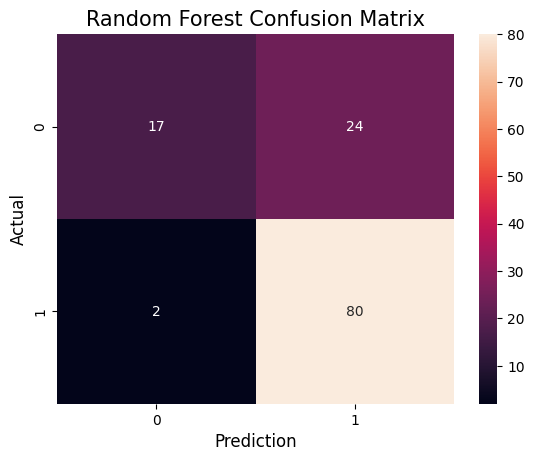

In [73]:
## Confusion matrix plot
sns.heatmap(conf_mat_RF, annot=True)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Random Forest Confusion Matrix', fontsize = 15)

In [74]:
auc_RF = roc_auc_score(y_test, y_pred_RF)
print('AUC: ',auc_RF)

AUC:  0.6951219512195121


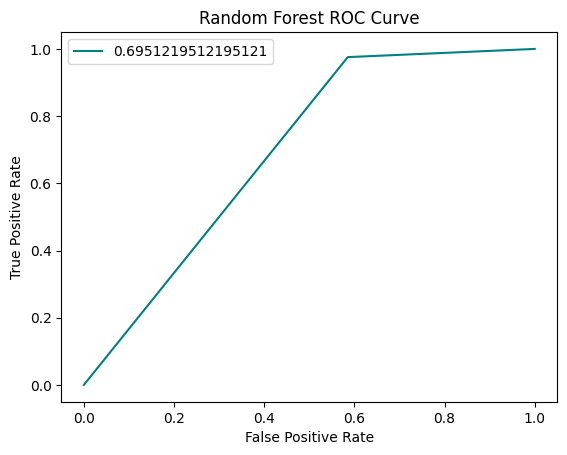

In [75]:
# false positive & true positive rate
# underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_RF)
plt.plot(fpr, tpr, color = 'teal', label = auc_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

In [76]:
## Classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.89      0.41      0.57        41
           1       0.77      0.98      0.86        82

    accuracy                           0.79       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.79      0.76       123



In [77]:
## SUPPORT VECTOR MACHINE (SVM) Model

In [78]:
## create a SVM Classifier
clfLinear = svm.SVC(kernel ='linear')
clfsigmoid = svm.SVC(kernel ='sigmoid')
clfrbf = svm.SVC(kernel ='rbf')

In [79]:
## fit the model
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [80]:
## make the prediction for test dadaset 
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [81]:
## model evaluation
## Calculate the accuracy of our model
print('Accurancy(Linear Kernel):', metrics.accuracy_score(y_test,y_pred_linear))
print('Accurancy(Sigmoid Kernel):', metrics.accuracy_score(y_test,y_pred_sigmoid))
print('Accurancy(RBF Kernel):', metrics.accuracy_score(y_test,y_pred_rbf))

Accurancy(Linear Kernel): 0.7886178861788617
Accurancy(Sigmoid Kernel): 0.7723577235772358
Accurancy(RBF Kernel): 0.7886178861788617


In [82]:
## Confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[17 24]
 [ 2 80]]
[[17 24]
 [ 4 78]]
[[17 24]
 [ 2 80]]


Text(0.5, 1.0, 'Linear Confusion Matrix')

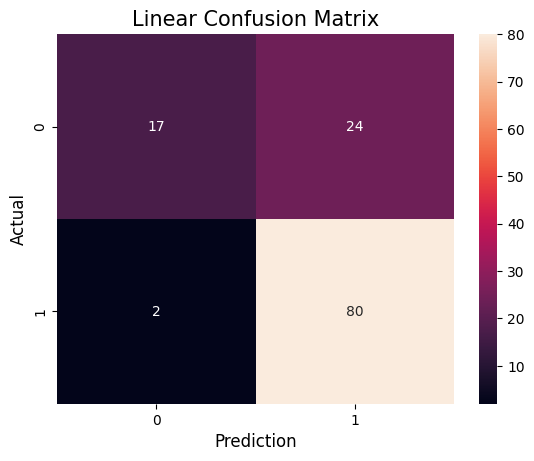

In [83]:
## Confusion matrix plot
sns.heatmap(conf_mat_linear, annot=True)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Linear Confusion Matrix', fontsize = 15)

Text(0.5, 1.0, 'Sigmoid Confusion Matrix')

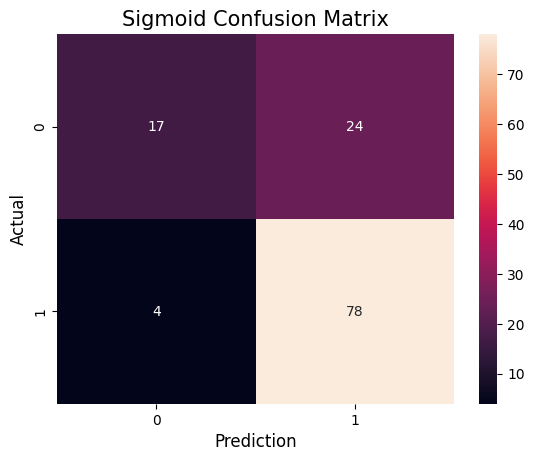

In [84]:
## Confusion matrix plot
sns.heatmap(conf_mat_sigmoid, annot=True)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Sigmoid Confusion Matrix', fontsize = 15)

Text(0.5, 1.0, 'rbf Confusion Matrix')

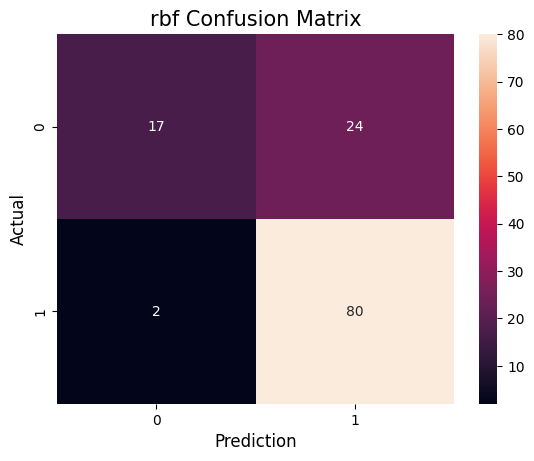

In [85]:
## Confusion matrix plot
sns.heatmap(conf_mat_rbf, annot=True)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('rbf Confusion Matrix', fontsize = 15)

In [86]:
## classification report
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.89      0.41      0.57        41
           1       0.77      0.98      0.86        82

    accuracy                           0.79       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.79      0.76       123



In [87]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.81      0.41      0.55        41
           1       0.76      0.95      0.85        82

    accuracy                           0.77       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.77      0.75       123



In [88]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.89      0.41      0.57        41
           1       0.77      0.98      0.86        82

    accuracy                           0.79       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.79      0.76       123



In [89]:
## Decision tree
## create a decision tree with criterion gini with no max depth
decision_tree_gini = DecisionTreeClassifier()

## entropy criterion with no max depth
decision_tree_entropy = DecisionTreeClassifier(criterion = 'entropy')

## max depth of 3
decision_tree_depth = DecisionTreeClassifier(max_depth=3)

In [90]:
## fit our model
decision_tree_gini.fit(X_train, y_train)
decision_tree_entropy.fit(X_train, y_train)
decision_tree_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [91]:
## make prediction

y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_entropy = decision_tree_entropy.predict(X_test)
y_pred_depth = decision_tree_depth.predict(X_test)

In [92]:
## model evaluation
print('Accurancy(gini):', metrics.accuracy_score(y_test,y_pred_gini))
print('Accurancy(entropy):', metrics.accuracy_score(y_test,y_pred_entropy))
print('Accurancy(depth):', metrics.accuracy_score(y_test,y_pred_depth))

Accurancy(gini): 0.7073170731707317
Accurancy(entropy): 0.6910569105691057
Accurancy(depth): 0.7967479674796748


In [93]:
## Confussion matrix 
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)
conf_mat_depth = confusion_matrix(y_test, y_pred_depth)

print(conf_mat_gini)
print(conf_mat_entropy)
print(conf_mat_depth)

[[20 21]
 [15 67]]
[[22 19]
 [19 63]]
[[19 22]
 [ 3 79]]


Text(0.5, 1.0, 'Gini Confusion Matrix')

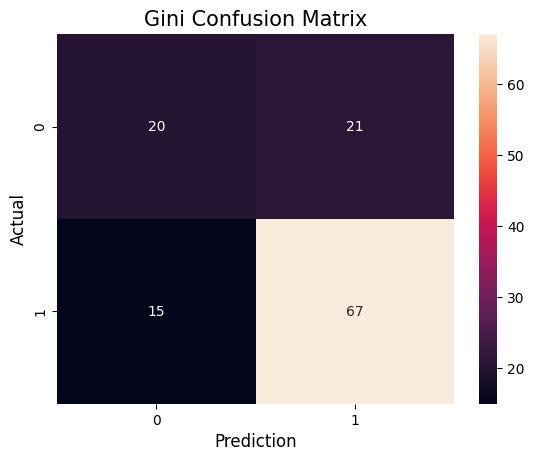

In [94]:
## Confusion matrix plot
sns.heatmap(conf_mat_gini, annot=True)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Gini Confusion Matrix', fontsize = 15)

Text(0.5, 1.0, 'Entropy Confusion Matrix')

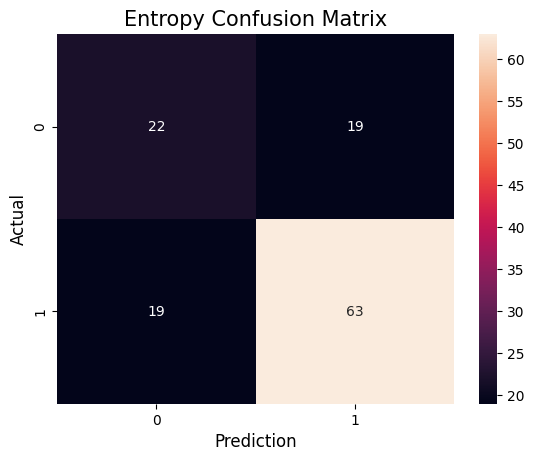

In [95]:
## Confusion matrix plot
sns.heatmap(conf_mat_entropy, annot=True)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Entropy Confusion Matrix', fontsize = 15)

Text(0.5, 1.0, 'Depth Confusion Matrix')

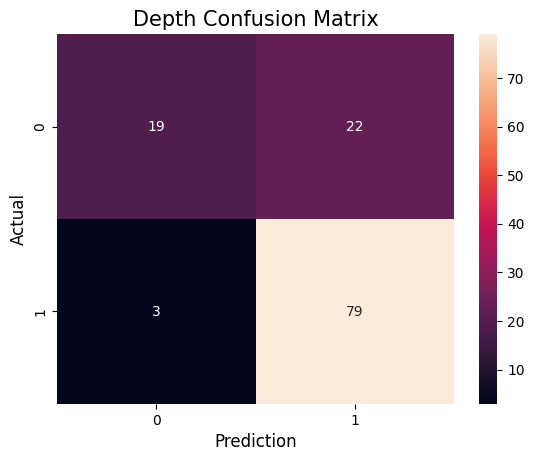

In [96]:
## Confusion matrix plot
sns.heatmap(conf_mat_depth, annot=True)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Depth Confusion Matrix', fontsize = 15)

In [97]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.57      0.49      0.53        41
           1       0.76      0.82      0.79        82

    accuracy                           0.71       123
   macro avg       0.67      0.65      0.66       123
weighted avg       0.70      0.71      0.70       123



In [98]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54        41
           1       0.77      0.77      0.77        82

    accuracy                           0.69       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.69      0.69      0.69       123



In [99]:
print(classification_report(y_test, y_pred_depth))

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        41
           1       0.78      0.96      0.86        82

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123



In [100]:
##Knn

In [101]:
##knn
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [102]:
y_pred_knn = knn_model.predict(X_test)

In [103]:
##
print('Accurancy:', metrics.accuracy_score(y_test,y_pred_knn))

Accurancy: 0.7723577235772358


In [104]:
pd.DataFrame({'Actual':y_test, 'predicted':y_pred_knn})

,Actual,predicted
51,1,1
19,1,1
494,0,0
612,1,1
188,1,1
...,...,...
378,0,0
479,0,1
44,1,1
461,1,1


In [105]:
## Confusion matrix
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_mat_knn)

[[20 21]
 [ 7 75]]


Text(0.5, 1.0, 'Knn Confusion Matrix')

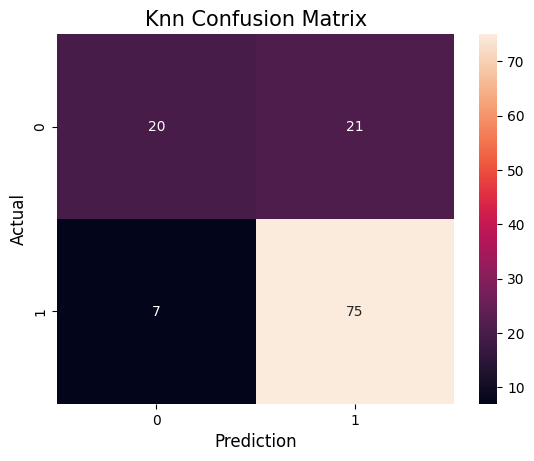

In [106]:
## Confusion matrix plot
sns.heatmap(conf_mat_knn, annot=True)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Knn Confusion Matrix', fontsize = 15)

In [107]:
auc_LR = roc_auc_score(y_test, y_pred_knn)
print('AUC: ',auc_LR)

AUC:  0.7012195121951219


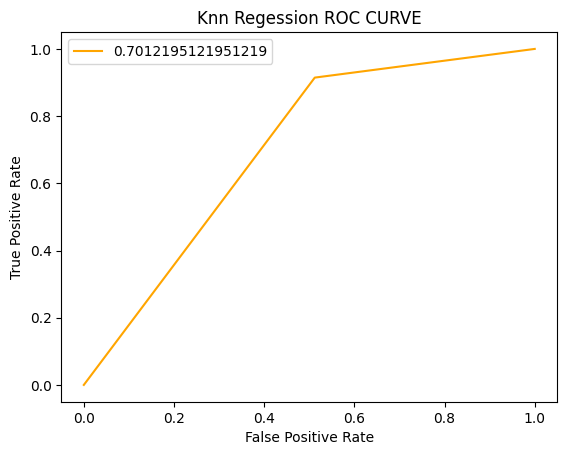

In [108]:
#False positive & true positive rate
# Underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn Regession ROC CURVE')
plt.legend()
plt.show()

In [109]:
## Classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.49      0.59        41
           1       0.78      0.91      0.84        82

    accuracy                           0.77       123
   macro avg       0.76      0.70      0.72       123
weighted avg       0.77      0.77      0.76       123



In [127]:
import joblib
# Save the model to a file
joblib.dump(knn_model, 'knn_model.joblib')

['knn_model.joblib']

In [110]:
threshold = y_train.mean()
threshold

0.6924643584521385

In [111]:
#### Artificial Neural Network(ANN)Model
##Modelling

In [112]:
## Neural Network
## initialise the NN
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 50, kernel_initializer= 'uniform', activation = 'relu', input_dim = 11))
## hidden layer 1 
model.add(Dense(units= 20, kernel_initializer= 'uniform', activation = 'relu'))
##regularization 1
model.add(Dropout(0.4))
## hidden layer 2
model.add(Dense(units= 4, kernel_initializer= 'uniform', activation = 'relu'))
##regularization 2
model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

## model
history = model.fit(X_train, y_train, batch_size = 25, epochs = 80, validation_split=0.25)

Epoch 1/80
15/15 [==============================] - 1s 20ms/step - loss: 0.6917 - accuracy: 0.6875 - val_loss: 0.6909 - val_accuracy: 0.6667
Epoch 2/80
15/15 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.7011 - val_loss: 0.6886 - val_accuracy: 0.6667
Epoch 3/80
15/15 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.7011 - val_loss: 0.6863 - val_accuracy: 0.6667
Epoch 4/80
15/15 [==============================] - 0s 6ms/step - loss: 0.6837 - accuracy: 0.7011 - val_loss: 0.6842 - val_accuracy: 0.6667
Epoch 5/80
15/15 [==============================] - 0s 6ms/step - loss: 0.6809 - accuracy: 0.7011 - val_loss: 0.6816 - val_accuracy: 0.6667
Epoch 6/80
15/15 [==============================] - 0s 6ms/step - loss: 0.6774 - accuracy: 0.7011 - val_loss: 0.6773 - val_accuracy: 0.6667
Epoch 7/80
15/15 [==============================] - 0s 5ms/step - loss: 0.6714 - accuracy: 0.7527 - val_loss: 0.6673 - val_accuracy: 0.8049
Epoch 8/80
15/15 [=

In [113]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 76.18%


In [114]:
# ## make prediction on test data
y_pred_ann = model.predict(X_test)
y_pred_ann = np.where(y_pred_ann>threshold, 1, 0)

4/4 [==============================] - 0s 5ms/step


In [115]:
## Confusion matrix
conf_mat_ann = confusion_matrix(y_test, y_pred_ann)
print(conf_mat_ann)

[[19 22]
 [ 8 74]]


Text(0.5, 1.0, 'ANN Confusion Matrix')

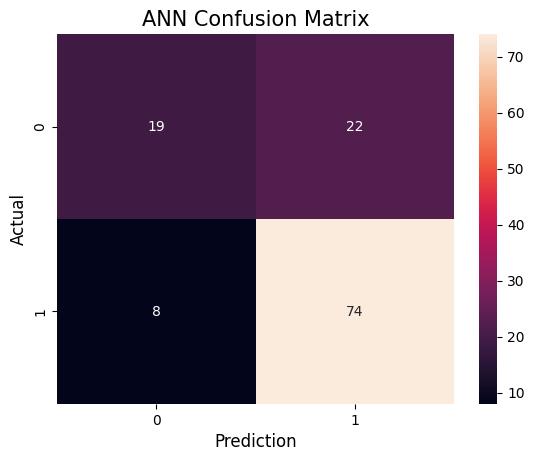

In [116]:
## Confusion matrix plot
sns.heatmap(conf_mat_ann, annot=True)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('ANN Confusion Matrix', fontsize = 15)

In [117]:
## Classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.70      0.46      0.56        41
           1       0.77      0.90      0.83        82

    accuracy                           0.76       123
   macro avg       0.74      0.68      0.70       123
weighted avg       0.75      0.76      0.74       123



In [118]:
## ## Save my model--- give it a name
model.save('loanprediction.h5')

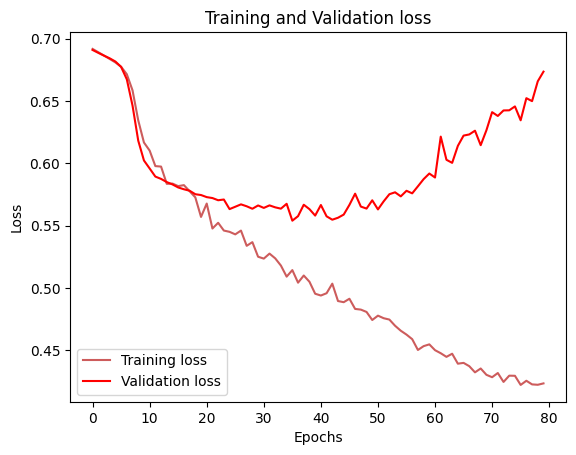

In [119]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

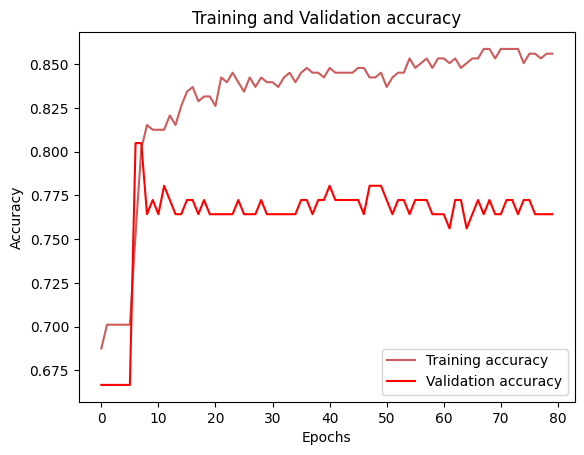

In [120]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

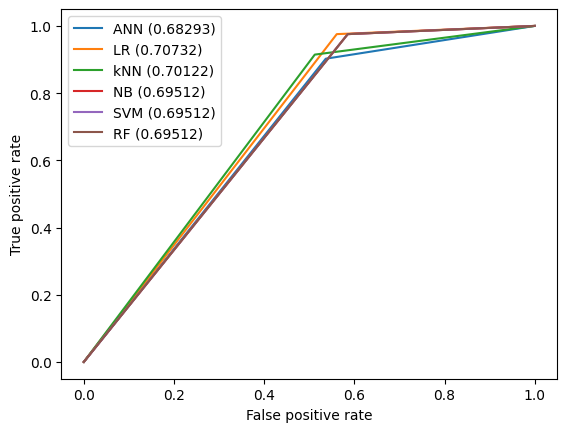

In [126]:
fpr_ann, tpr_ann = roc_curve(y_test, y_pred_ann)[0:2]
fpr_LR, tpr_LR = roc_curve(y_test, y_pred_LR)[0:2]
fpr_kNN, tpr_kNN = roc_curve(y_test, y_pred_knn)[0:2]
fpr_NB, tpr_NB = roc_curve(y_test, y_pred_NB)[0:2]
fpr_SVM, tpr_SVM = roc_curve(y_test, y_pred_linear)[0:2]
fpr_RF, tpr_RF = roc_curve(y_test, y_pred_RF)[0:2]
cba = []
predictions = [y_pred_ann, y_pred_LR, y_pred_knn, y_pred_NB, y_pred_linear, y_pred_RF]
for i in predictions:
    cba.append(roc_auc_score(y_test, i))

plt.plot(fpr_ann, tpr_ann, label=f"ANN ({cba[0]:.5f})")
plt.plot(fpr_LR, tpr_LR, label=f"LR ({cba[1]:.5f})")
plt.plot(fpr_kNN, tpr_kNN, label=f"kNN ({cba[2]:.5f})")
plt.plot(fpr_NB, tpr_NB, label=f"NB ({cba[3]:.5f})")
plt.plot(fpr_SVM, tpr_SVM, label=f"SVM ({cba[4]:.5f})")
plt.plot(fpr_RF, tpr_RF, label=f"RF ({cba[5]:.5f})")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()